/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  app.launch_new_instance()


217088
44100
133.0


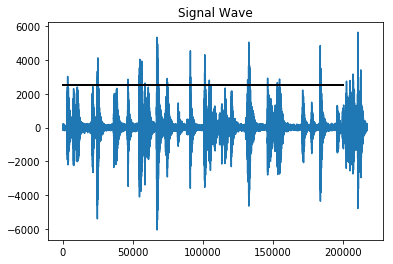

In [27]:
import numpy
import thinkdsp
import thinkplot
import matplotlib.pyplot as plt
import wave
import sys
from functools import reduce
numpy.set_printoptions(threshold=numpy.inf)
#numpy.set_printoptions(threshold=10)

#short_pop = thinkdsp.read_wave('short_pops.wav')
#open wave with read only
short_pop_wave = wave.open('short_pops.wav','r')
#Extract Raw Audio from Wav File
signal = short_pop_wave.readframes(-1)
signal = numpy.fromstring(signal, 'Int16')
#print(signal)
size = len(signal)
print(size)
framerate = short_pop_wave.getframerate()
print(framerate)

threshold = 2500
def aboveThreshold(x):
    if x > threshold:
        return 1
    else:
        return 0

#creates array the same size as signal data array, every value is threshold
thresholdArray = numpy.full(size, threshold)
booleanArray = list(map(aboveThreshold, signal))
#print(booleanArray)
gradientArray = numpy.gradient(booleanArray)
#print(gradientArray)
#do hella gradients?

filteredArray = list(filter(lambda x: x > 0, gradientArray))
print(len(filteredArray)/2)



plt.figure(1)
plt.title('Signal Wave')
plt.plot(signal)
plt.plot([0, 200000], [threshold, threshold], 'k-', lw=2)
plt.show()

